In [2]:
"https://builtin.com/data-science/time-series-python"

'https://builtin.com/data-science/time-series-python'

In [3]:
import pandas as pd
df = pd.read_csv("../csv/Ming25Jun67_total_order.csv")
df.head()

,order_completed_at,unique_order_count
0,2023-01-01,15
1,2023-01-02,32
2,2023-01-03,89
3,2023-01-04,73
4,2023-01-05,67


In [4]:
df.tail()

,order_completed_at,unique_order_count
536,2024-06-20,120
537,2024-06-21,152
538,2024-06-22,138
539,2024-06-23,126
540,2024-06-24,149


In [5]:
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_completed_at  541 non-null    datetime64[ns]
 1   unique_order_count  541 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [7]:
df.index = df['order_completed_at']
del df['order_completed_at']
print(df.head())

                    unique_order_count
order_completed_at                    
2023-01-01                          15
2023-01-02                          32
2023-01-03                          89
2023-01-04                          73
2023-01-05                          67


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0, 0.5, 'Number Of Orders.')

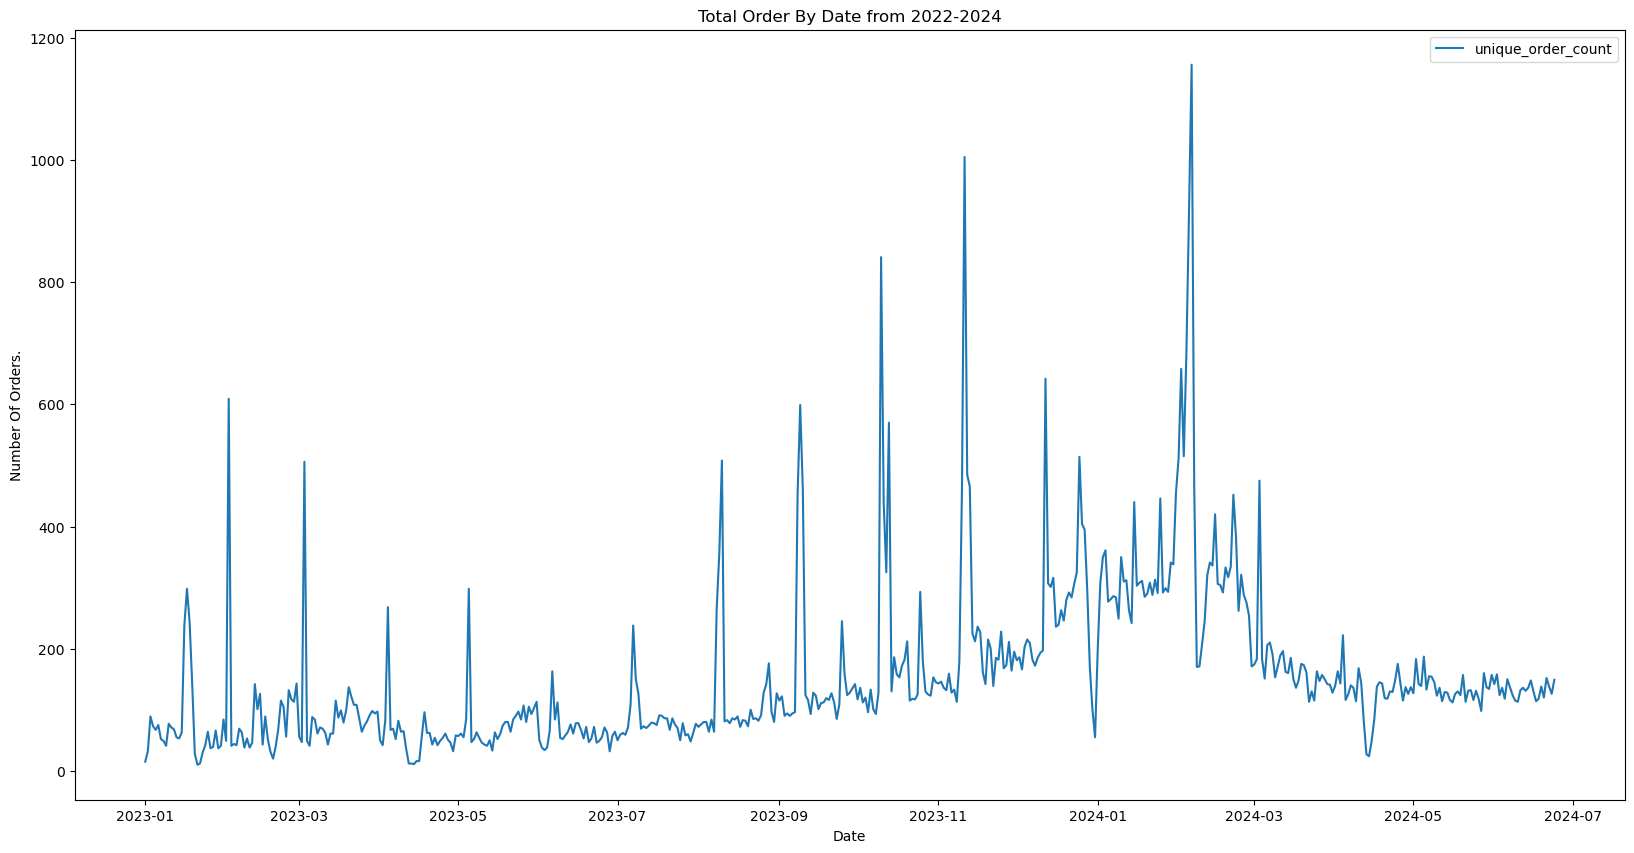

In [9]:
plt.figure(figsize=(20, 10)) 

sns.lineplot(df)
plt.title('Total Order By Date from 2022-2024')
plt.xlabel('Date')
plt.ylabel("Number Of Orders.")

### Stationarity test

In [10]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

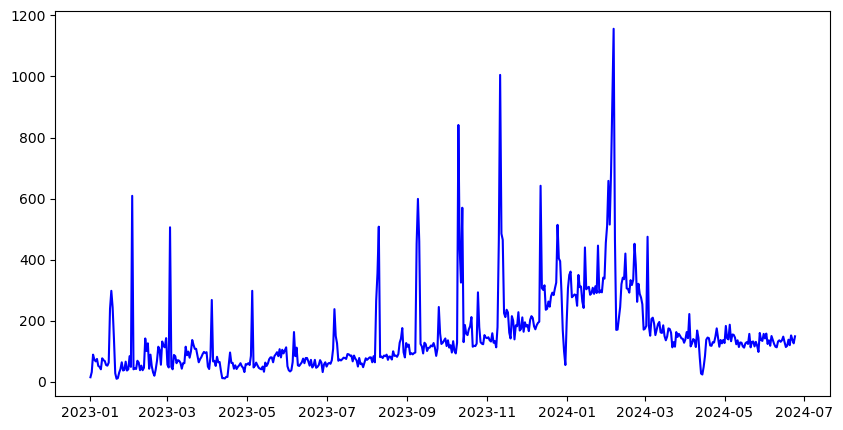

In [11]:
plt.figure(figsize=(10, 5)) 
plt.plot(df, color="blue",label="Original Orders Data")

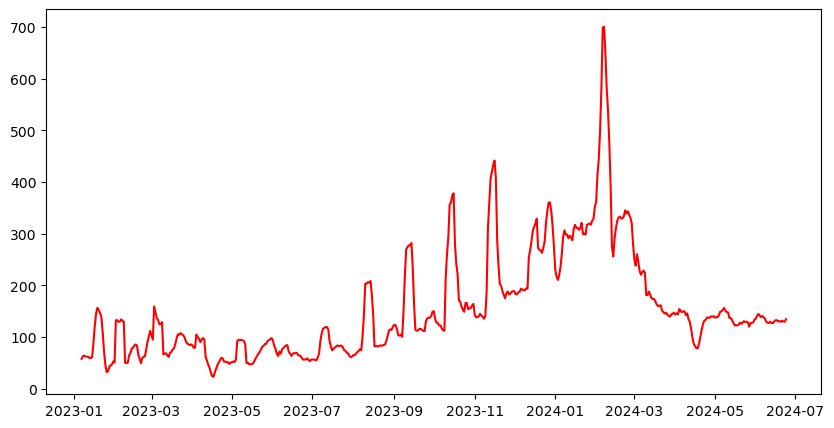

In [12]:
plt.figure(figsize=(10, 5)) 
plt.plot(rolling_mean, color="red", label="Rolling Mean Orders Number")

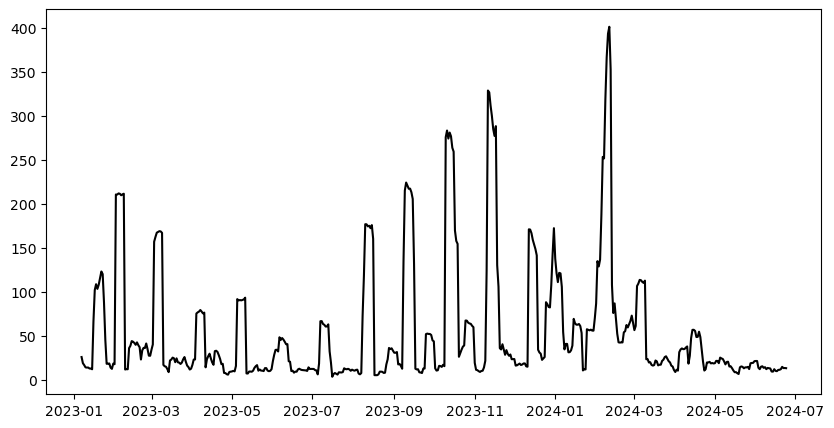

In [13]:
plt.figure(figsize=(10, 5)) 
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Orders Number")

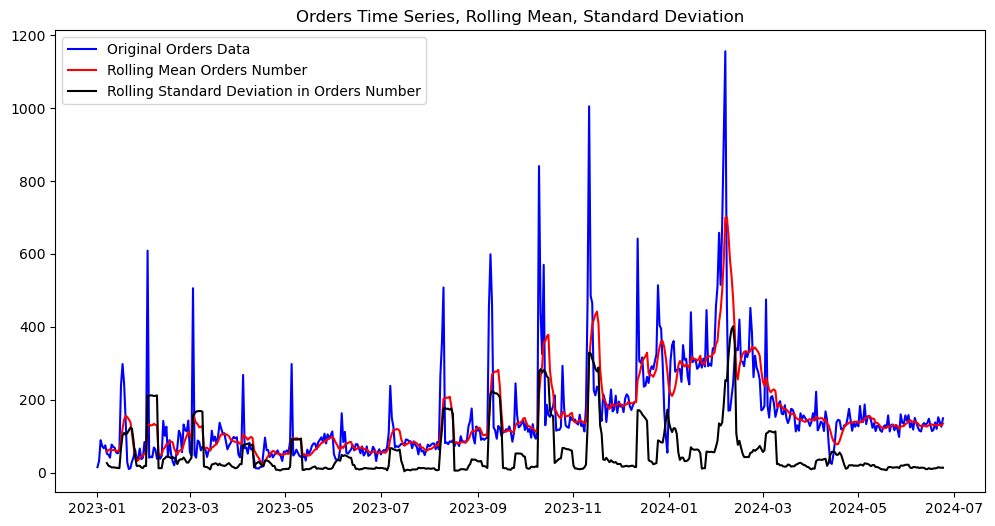

In [14]:
plt.figure(figsize=(12, 6)) 
plt.plot(df, color="blue",label="Original Orders Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Orders Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Orders Number")
plt.title("Orders Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [15]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)


       Values                       Metric
0   -2.984690              Test Statistics
1    0.036349                      p-value
2   11.000000             No. of lags used
3  529.000000  Number of observations used
4   -3.442772          critical value (1%)
5   -2.867019          critical value (5%)
6   -2.569688         critical value (10%)


In [16]:
autocorrelation_lag1 = df['unique_order_count'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.7167255598672349


In [17]:
for i in range(1,34):
    autocorrelation_lag = df['unique_order_count'].autocorr(lag=i)
    print(f"{i} Day Lag: ", autocorrelation_lag)
    print()

1 Day Lag:  0.7167255598672349

2 Day Lag:  0.5695051543201133

3 Day Lag:  0.4757986143056801

4 Day Lag:  0.41748802556804

5 Day Lag:  0.40152254520393554

6 Day Lag:  0.3950227789460745

7 Day Lag:  0.38923107749186814

8 Day Lag:  0.3939224527126459

9 Day Lag:  0.39627226264632504

10 Day Lag:  0.4022535392069177

11 Day Lag:  0.38367787814074816

12 Day Lag:  0.4019806481762616

13 Day Lag:  0.39719110437775734

14 Day Lag:  0.39671297439143177

15 Day Lag:  0.41250133800159416

16 Day Lag:  0.405798127350672

17 Day Lag:  0.4126940124225376

18 Day Lag:  0.3818866572836902

19 Day Lag:  0.3735104545499313

20 Day Lag:  0.3761671846615679

21 Day Lag:  0.3863696133283368

22 Day Lag:  0.3758680276742725

23 Day Lag:  0.34874733815364833

24 Day Lag:  0.32495280931529275

25 Day Lag:  0.33434966796897736

26 Day Lag:  0.35457342800379466

27 Day Lag:  0.3349141456923171

28 Day Lag:  0.33235879818332836

29 Day Lag:  0.41878966213437363

30 Day Lag:  0.4388122985884156

31 Day La

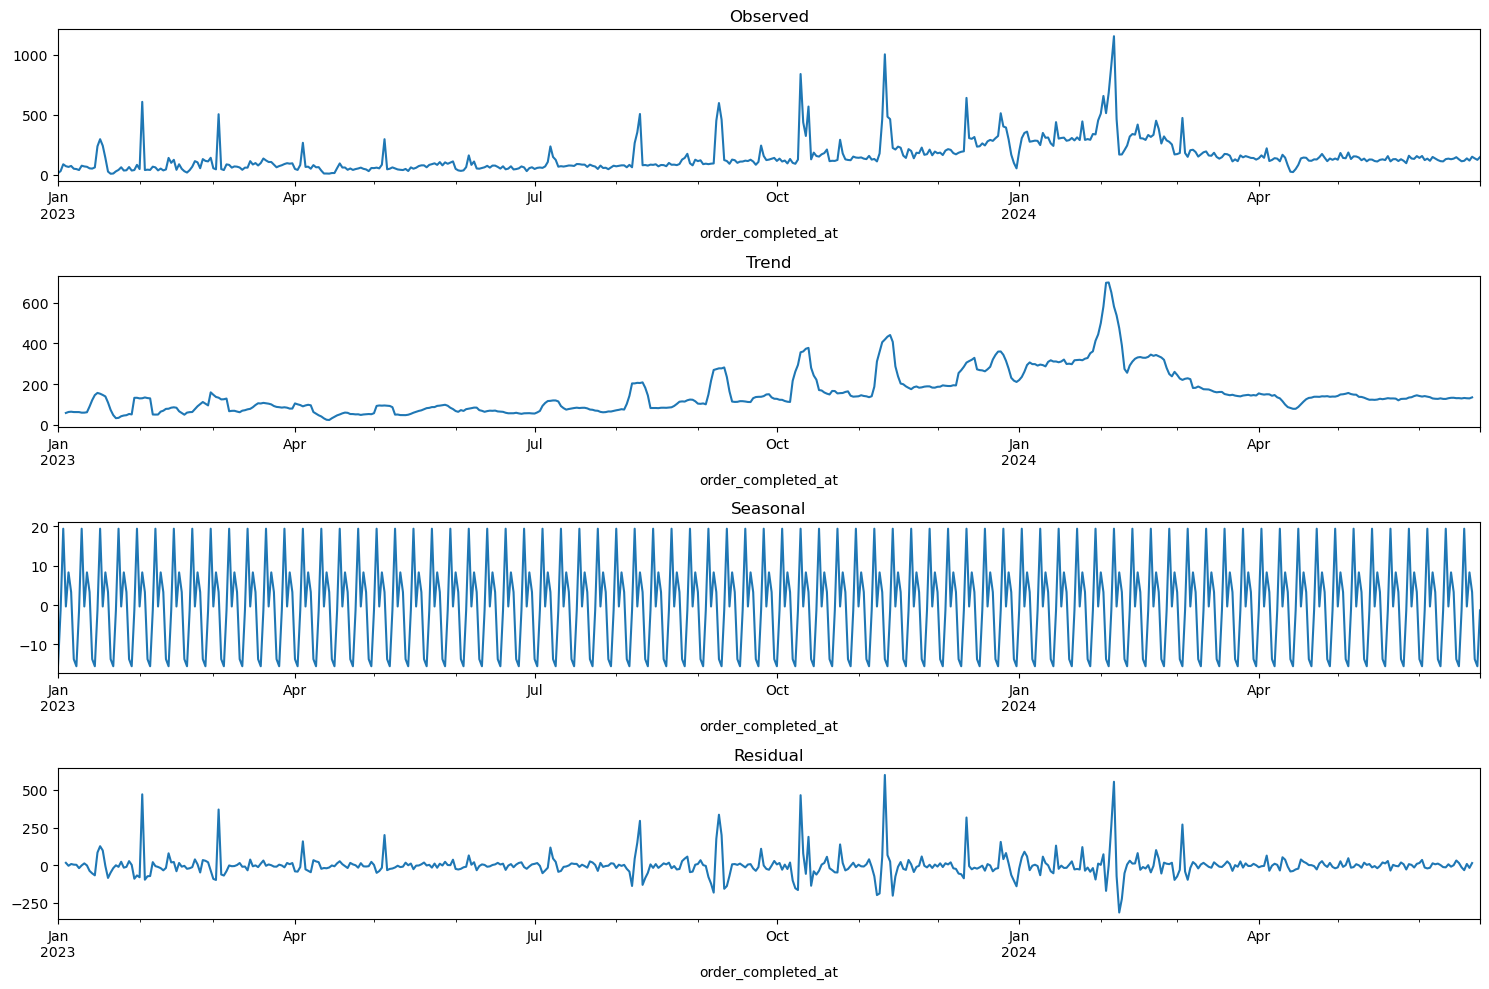

In [18]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decompose = seasonal_decompose(df['unique_order_count'], model='additive', period=7)

# Create a new figure with specified size
fig, axes = plt.subplots(4, 1, figsize=(15, 10))  # Adjust the size as needed

# Plot the observed, trend, seasonal, and residual components
decompose.observed.plot(ax=axes[0], title='Observed')
decompose.trend.plot(ax=axes[1], title='Trend')
decompose.seasonal.plot(ax=axes[2], title='Seasonal')
decompose.resid.plot(ax=axes[3], title='Residual')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_34000\1300992096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['unique_order_count']
C:\Users\User\AppData\Local\Temp\ipykernel_34000\1300992096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['unique_order_count']


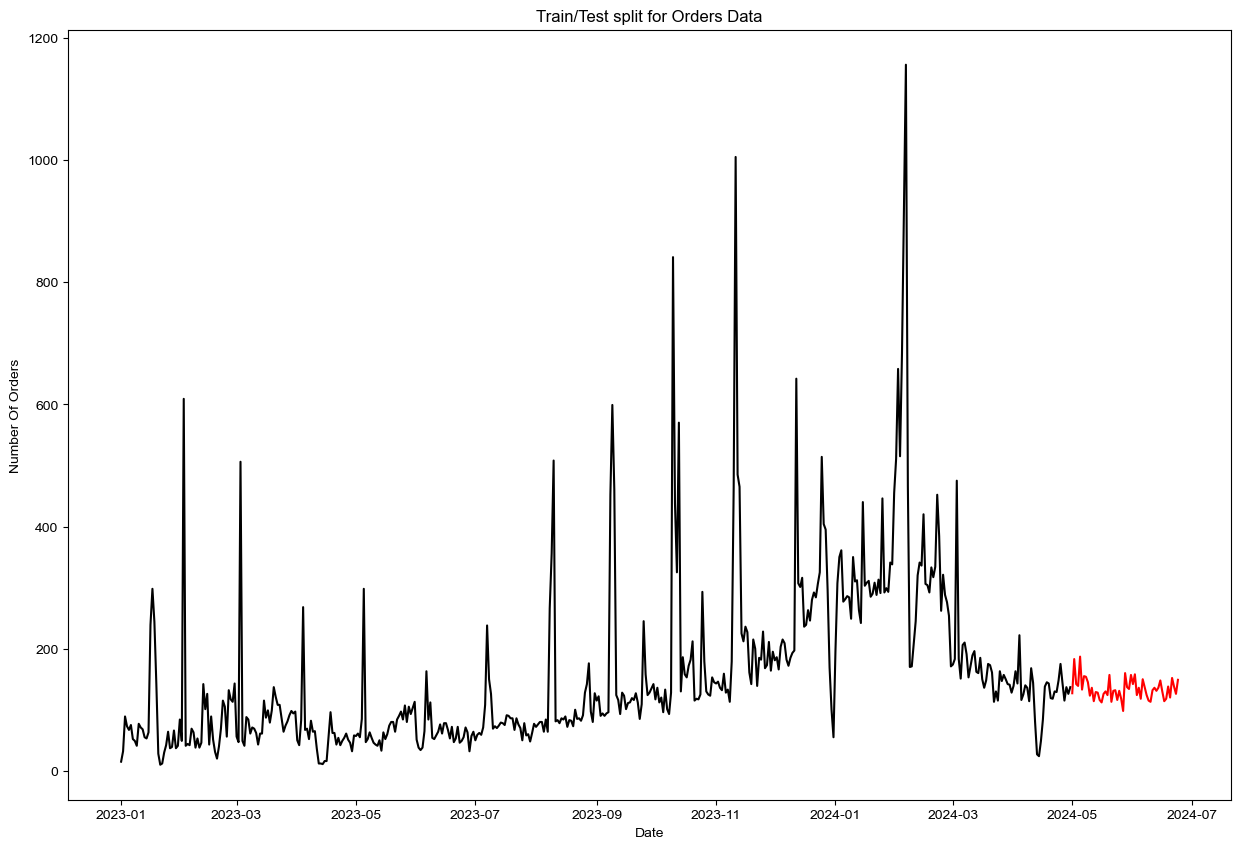

In [19]:
df['Date'] = df.index
train = df[df['Date'] < pd.Timestamp("2024-05-01")]
train['train'] = train['unique_order_count']
del train['Date']
del train['unique_order_count']

test = df[df['Date'] >= pd.Timestamp("2024-05-01")]
del test['Date']
test['test'] = test['unique_order_count']
del test['unique_order_count']

plt.figure(figsize=(15, 10)) 
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Orders Data")
plt.ylabel("Number Of Orders")
plt.xlabel('Date')
sns.set()
plt.show()

In [20]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5800.010, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5900.319, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5873.866, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5857.862, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5898.322, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5798.038, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5819.337, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5796.039, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5798.037, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5863.214, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5794.120, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5855.868, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5871.870, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5796.118, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]          

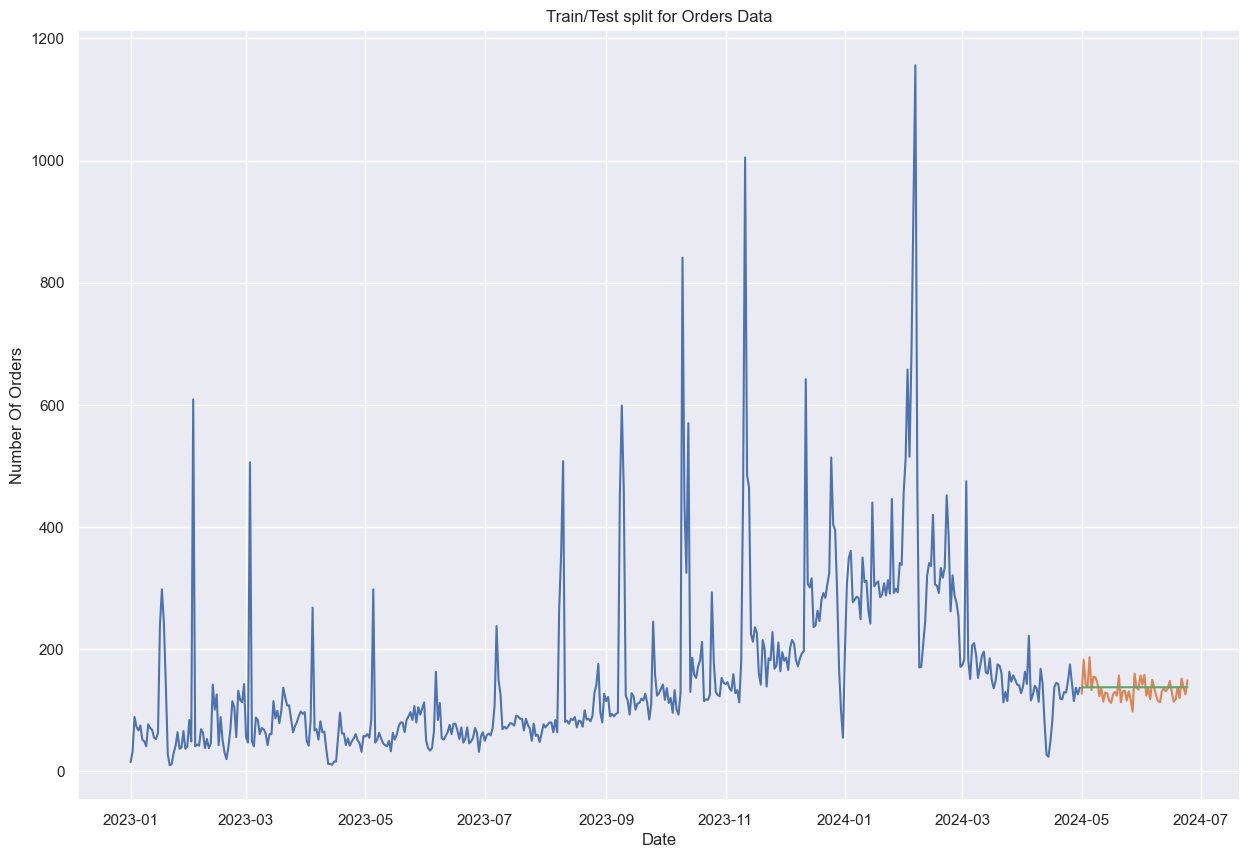

In [21]:
plt.figure(figsize=(15, 10)) 
plt.plot(train)
plt.plot(test)
plt.plot(forecast)
plt.title("Train/Test split for Orders Data")
plt.ylabel("Number Of Orders")
plt.xlabel('Date')
sns.set()
plt.show()

In [22]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test,forecast)
rms = sqrt(mse)

print("RMSE: ", rms)
print("MSE: ", mse)

RMSE:  17.37444360472391
MSE:  301.8712905737316


In [31]:
from pmdarima.arima import auto_arima
model = auto_arima(df, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df)
forecast = model.predict(n_periods=7)

forecast = pd.DataFrame(forecast, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6400.716, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6513.867, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6483.695, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6465.608, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6511.870, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6398.747, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6422.602, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6396.747, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6398.747, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6471.545, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6394.819, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6463.615, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6481.700, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6396.819, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [32]:
print(forecast)

            Prediction
2024-06-25  141.749481
2024-06-26  138.032690
2024-06-27  136.127373
2024-06-28  135.150661
2024-06-29  134.649975
2024-06-30  134.393311
2024-07-01  134.261739
